# MNIST Tutorial to get started with Keras
Available in: https://elitedatascience.com/keras-tutorial-deep-learning-in-python.

Modified to work with Tensorflow backend

### Test if libs are installed and with updated versions

In [1]:
import numpy
import tensorflow
import keras
import matplotlib
import numpy as np

print(numpy.__version__)
print(tensorflow.__version__)
print(keras.__version__)
print(matplotlib.__version__)
print(np.__version__)

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'
#suppress tensor flow deprecation warnings for now

from keras import backend as K
K.set_image_dim_ordering('tf')

1.16.4
1.14.0
2.2.4
3.1.1
1.16.4


Using TensorFlow backend.



### Import libraries and modules

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.utils import np_utils

from keras.datasets import mnist

from matplotlib import pyplot as plt

* For reproducibility of future results from the numpy lib

In [19]:
np.random.seed(123) 

In [20]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)

(60000, 28, 28)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

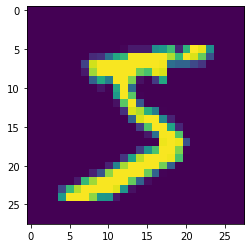

In [21]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

print(X_train[0])

### Preprocess input data for Keras

In [22]:
# Theano shape format
# X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
# X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

# Tensor flow shape format
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(X_train.shape)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

(60000, 28, 28, 1)


### Preprocess class labels for Keras

In [23]:
print(y_train.shape)
print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [24]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(Y_train.shape)

(60000, 10)


### Define model architecture

In [25]:
model = Sequential()

 
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

### Compile module

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit model on training data

In [27]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/home/reinaldo/masters/ai/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.2140 - acc: 0.9336
Epoch 2/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0879 - acc: 0.9733
Epoch 3/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0665 - acc: 0.9801
Epoch 4/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0557 - acc: 0.9832
Epoch 5/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0467 - acc: 0.9854
Epoch 6/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0398 - acc: 0.9876
Epoch 7/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0370 - acc: 0.9877
Epoch 8/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0333 - acc: 0.9892
Epoch 9/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0309 - acc: 0.9905
Epoch 10/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0278 - acc: 0.9908

### Evaluate model on test data

In [31]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.026278711957188717, 0.9919]
